In [ ]:
#신경망 구현
#1.초기화(입력, 은닉, 출력 노드의 수 설정)
#2.학습(가중치 업데이트)
#3.질의(입력 -> 연산 -> 출력 노드에 전달)

In [4]:
import scipy
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [5]:

class neuralNetwork:
    #신경망 초기화 기능
    def __init__(self,input_nodes,hidden_nodes,output_nodes,learning_rate):
        self.inodes=input_nodes
        self.hnodes=hidden_nodes
        self.onodes=output_nodes
        self.lr=learning_rate
#가중치는 행렬로 표현
#입력/은닉 가중치 행렬 형식 : 
#(은닉노드 * 입력노드)
#은닉/출력 가중치 행렬 형식 : 
#(출력노드 * 은닉노드)

#입력, 은닉 계층 사이의 가중치 행렬
        self.wih=np.random.normal(0.0,
                         pow(self.hnodes,-0.5),
                         (self.hnodes,self.inodes))
        #np.random.normal(평균,표준편차,개수)

#은닉, 출력 계층 사이의 가중치 행렬
        self.who=np.random.normal(0.0,
                         pow(self.onodes,-0.5),
                         (self.onodes,self.hnodes))
    
        self.activation_function=lambda x:scipy.special.expit(x) #sigmoid    
        pass
    
    
    #신경망 학습 기능(2단계)
    #1단계(forward propagaton):입력 데이터에 대해 계산(query)
    #2단계(backward propagaton):예측값과 실제값의 차이를 계산 -> 가중치 업데이트 단계
    
    def train(self, inputs_list, targets_list):
        inputs=np.array(inputs_list, ndmin=2).T
        targets=np.array(targets_list, ndmin=2).T
        
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)        
        #출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who, hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs=self.activation_function(final_inputs)
        
        output_errors=targets-final_outputs
        #오차=실제값-예측값
        
        #은닉 계층 노드에 대한 역전파된 오차        
        #은닉 계층의 오차는 가중치에 의해 나뉜 
        #출력 계층의 오차들을 재조합하여 계산
        hidden_errors=np.dot(self.who.T,output_errors)
        #은닉 계층과 출력 계층 간의 가중치 업데이트(who)        
        self.who+=self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))        
        pass
    
    
    
    #신경망 질의 기능:신경망으로 들어오는 입력을 받아 출력을 반환
    def query(self, inputs_list):
        #입력리스트를 2차원 행렬로 변환
        inputs=np.array(inputs_list, ndmin=2).T
        
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)        
        #출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who, hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

In [31]:
input_nodes=3
hidden_nodes=3
output_nodes=3

#학습률 정의(0.1~0.001)
learning_rate=0.3

#신경망 클래스 객체를 생성
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
n.query([1.0, 0.5, -1.5])

array([[0.64892961],
       [0.7162482 ],
       [0.55003124]])

In [32]:
np.array([1,2,3])
np.array([1,2,3.0])
np.array([[1,2],[3,4]])
np.array([1,2,3], ndmin=2)

array([[1, 2, 3]])

In [33]:
data_file=open("mnist_train_100.csv","r")
data_list=data_file.readlines()
len(data_list) #길이 100

100

In [34]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

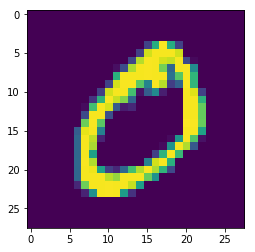

In [35]:
import matplotlib.pyplot as plt

all_values=data_list[1].split(",")
#array(28 ,28)로 변환해야 image 출력 가능
image_array=np.asfarray(all_values[1:]).reshape(28,28) #asfarray : 문자 => 숫자
plt.imshow(image_array, interpolation=None)

In [36]:
#0~255 => 정규화 범위 : 0.01~1.0
scaled_input=(np.asfarray(all_values[1:])/255*0.99)+0.01

In [37]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [38]:
onodes=10 #출력노드 종류가 10가지
targets=np.zeros(onodes)+0.01
targets[int(all_values[0])]=0.99
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [39]:
#입력, 은닉, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10 #0~9

#학습률 0.3
learning_rate=0.3

#신경망 객체 생성
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#mnist 트레이닝 데이터 불러오기
trainig_data_file=open("mnist_train_100.csv","r")
training_data_list=trainig_data_file.readlines()
trainig_data_file.close()

epochs=5
for e in range(epochs):
#신경망 학습
    for record in training_data_list:
        all_values=record.split(",")
        inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
        #0.01~1.0으로 스케일링
        #결과값 생성
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs, targets)

In [40]:
test_data_file=open("mnist_test_10.csv","r")
test_data_list=test_data_file.readlines()
test_data_file.close()

In [41]:
import matplotlib.pyplot as plt

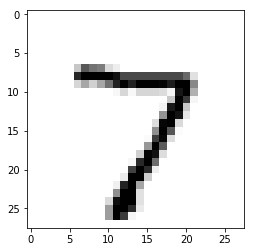

In [42]:
all_values=test_data_list[0].split(",")
all_values[0]

image_array=np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys")

In [43]:
test_data_list[0]

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

In [44]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(",")
    #정답
    correct_label=int(all_values[0])
    print(correct_label, ": correct label")
    
    
    outputs=n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
    label= np.argmax(outputs)
    print(label, ": My answer")
    
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
scorecard_array=np.asarray(scorecard)
print(scorecard_array.sum()/scorecard_array.size)

7 : correct label
7 : My answer
2 : correct label
0 : My answer
1 : correct label
1 : My answer
0 : correct label
0 : My answer
4 : correct label
4 : My answer
1 : correct label
1 : My answer
4 : correct label
9 : My answer
9 : correct label
4 : My answer
5 : correct label
4 : My answer
9 : correct label
4 : My answer
0.5


In [27]:
import pandas as pd

#입력, 은닉, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10 #0~9

#학습률 0.3
learning_rate=0.3

#신경망 객체 생성
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#mnist 트레이닝/테스트 데이터 불러오기
trainig_data_file=open("mnist-in-csv/mnist_train.csv")
training_data_list=trainig_data_file.readlines()
trainig_data_file.close()

test_data_file=open("mnist-in-csv/mnist_test.csv")
test_data_list=test_data_file.readlines()
test_data_file.close()

In [30]:
trainig_data_list[0]


array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,
        18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 15

In [29]:
for epochs in range(1,100,10):
    print(epochs)
    for e in range(epochs):
    #신경망 학습
        for record in training_data_list:
            all_values=record.split(",")
            inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
            targets=np.zeros(output_nodes)+0.01
            targets[int(all_values[0])]=0.99
            n.train(inputs, targets)


    scorecard=[]
    total_sc_list=[]
    for record in test_data_list:
        all_values=record.split(",")
        #정답
        correct_label=int(all_values[0])
        print(correct_label, ": correct label")


        outputs=n.query((np.asfarray(all_values[1:])/255*0.99)+0.01)
        label= np.argmax(outputs)
        print(label, ": My answer")

        if (label==correct_label):
             scorecard.append(1)
        else:
            scorecard.append(0)

    scorecard_array=np.asarray(scorecard)
    total_sc=(scorecard_array.sum()/scorecard_array.size)
    total_sc_list.append(total_sc)
    print(total_sc_list)
    #total_sc=pd.DataFrame((scorecard_array.sum()/scorecard_array.size))
    #total_sc.columns=[epoch]
    #total_sc.join(total_sc)
    #print(scorecard_array.sum()/scorecard_array.size)

1


ValueError: could not convert string to float: '1x1'